# Importing the McDonald's Reviews Data

In [1]:
from google.colab \
import drive
import os, glob

def path_to_data(data_file):
  # If Google drive is not mounted it, mount it.
  if not os.path.exists('/content/drive'):
    drive.mount(os.getcwd() + '/drive')
  # Fetch the path of the notebook's location within the user's drive structure
  file_path = glob.glob(os.getcwd() + '/**/'
  + data_file, recursive = True)

  return file_path[0]

In [2]:
# Google Colab does not come with the latest version of Tensorflow,
# this causes issues on the serverside due to differences between 2.15 and 2.16
# As such, it needs to be updated.

!pip uninstall tensorflow -y

!pip install tensorflow==2.16.1

import tensorflow as tf
print(tf.__version__)

Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
2.16.1


In [3]:
# Remove older version of Keras to avoid any conflicts.

!pip uninstall tf-keras -y


In [4]:
import pandas as pd
import io

#data_path = 'McDonald_s_Reviews.csv'
data_path = path_to_data('McDonald_s_Reviews.csv')
print(data_path)

df_raw = pd.read_csv(data_path, encoding='UTF-8', encoding_errors='ignore')
df_raw.head()
#print(df_raw.head(5))

/content/drive/MyDrive/Project/McDonald_s_Reviews.csv


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


# Looking at the data manually

## One word reviews

Remark: some of the dataset seems to just be one word reviews, like "Excellent" "neutral" or "good" which is likely a placeholder for when the user only put in a rating, but left no written review along with the rating.

Since these reviews provide no insight to the purpose of this project, they are removed.

In [5]:
df_raw.iloc[1537:1576]

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
1537,1538,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",5 years ago,Excellent,5 stars
1538,1539,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",3 years ago,Neutral,3 stars
1539,1540,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",4 years ago,Neutral,3 stars
1540,1541,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",5 years ago,Neutral,3 stars
1541,1542,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",5 years ago,Neutral,3 stars
1542,1543,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",3 years ago,Terrible,1 star
1543,1544,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",a month ago,Excellent,5 stars
1544,1545,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",3 years ago,Excellent,5 stars
1545,1546,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",4 years ago,Good,4 stars
1546,1547,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",8 months ago,Terrible,1 star


## Encoding Errors in the Data
There are some encoding errors in the data. These were probably creted when the data was scraped.

Various encodings were tried to remove the encoding errors. (e.g. to UTF-8, latin', 'cp1252','ISO-8859-1', or some other UTF (like UTF-16, UTF-32, or the LE/BE versions used on the web). However, none of these common encoding formats fixed the problem.

As such, the encoding errors were simply removed.

In [6]:
lines_to_print = [1884, 1897, 1903, 1904, 1905, 1910, 1911, 1930, 1931, 1934, 1935, 1947]

# Subtract 1 from each line number because Python uses 0-based indexing
lines_to_print = [line-1 for line in lines_to_print]

df_raw.loc[lines_to_print, "review"]


1883    The food was top notch and very enjoyable, the...
1896    The morning shift is very racist and racially ...
1902    The place seems cool, actually isn������������...
1903    Pretty good. About what you expect from a McDo...
1904    Ordered pick up and when I got home realized 3...
1909    Double check your orders before leaving. Twice...
1910                        Staffs are good.good service.
1929    The worst McDonald���������������������������s...
1930                     They never get your order right.
1933    This McDonald���������������������������s had ...
1934    Too expensive for the type of service they pro...
1946    4 days ago, 8 o'clock hour (am), I Asked for a...
Name: review, dtype: object

# Cleaning up the data

Condition 1: 290 rows removed
Condition 2: 316 rows removed
Condition 3: 942 rows removed
Condition 4: 1307 rows removed
Condition 5: 2164 rows removed
1     290
2     316
3     942
4    1307
5    2164
dtype: int64


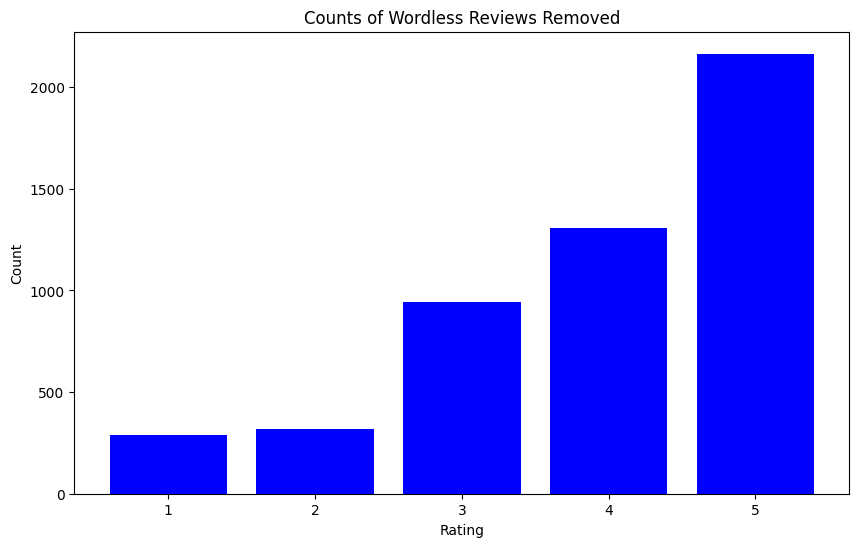

1883    The food was top notch and very enjoyable, the...
1896    The morning shift is very racist and racially ...
1902    The place seems cool, actually isnt bad as oth...
1903    Pretty good. About what you expect from a McDo...
1904    Ordered pick up and when I got home realized 3...
1909    Double check your orders before leaving. Twice...
1910                        Staffs are good.good service.
1929    The worst McDonalds I have ever been to and wi...
1930                     They never get your order right.
1933    This McDonalds had a full makeover but the cus...
1934    Too expensive for the type of service they pro...
1946    4 days ago, 8 o'clock hour (am), I Asked for a...
Name: review, dtype: object

In [7]:
### Bernard Comment: Regarding the table in the "One word reviews", I think We should consider "Terrible" for 1-star rating. Am I right?

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Removing potential encoding errors fromt the data.
df_raw = df_raw.replace('�+(?=(s|t|ve|re|ve))', '', regex=True)
df_raw = df_raw.replace('�', '', regex=True)

# Define the conditions and corresponding labels
conditions = [
#    (df_raw['review'].str.strip() == 'Bad') & (df_raw['rating'] == '1 star'),
    (df_raw['review'].str.strip() == 'Terrible') & (df_raw['rating'] == '1 star'),
    (df_raw['review'].str.strip() == 'Poor') & (df_raw['rating'] == '2 stars'),
    (df_raw['review'].str.strip() == 'Neutral') & (df_raw['rating'] == '3 stars'),
    (df_raw['review'].str.strip() == 'Good') & (df_raw['rating'] == '4 stars'),
    (df_raw['review'].str.strip() == 'Excellent') & (df_raw['rating'] == '5 stars')
]
labels = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Initialize a dictionary to store the counts
counts = {}

# Remove rows that meet the conditions and count them
for i, condition in enumerate(conditions):
    condition = condition.reindex(df_raw.index)
    counts[i+1] = df_raw[condition].shape[0]
    df_raw = df_raw[~condition]

# Print the counts
for i, count in counts.items():
    print(f"Condition {i}: {count} rows removed")

# Convert the counts to a Series for easier plotting
counts = pd.Series(counts)
print(counts)
# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='b')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Wordless Reviews Removed')

plt.show()

# Checking
df_raw.loc[lines_to_print, "review"]

## Removing NaN values from review

In [8]:
# Find non-string instances
non_strings = df_raw[df_raw['review'].apply(lambda x: not isinstance(x, str))]

# Print non-string instances
print(non_strings)

# Get the indices of the non-string instances
indices_to_drop = non_strings.index

df_raw.drop(indices_to_drop, inplace=True)

# Check to see if they were actually removed.
# Find non-string instances
non_strings = df_raw[df_raw['review'].apply(lambda x: not isinstance(x, str))]

# Print non-string instances
print("Non-string instances after removal: ", non_strings)

       reviewer_id  store_name              category  \
7458          7459  McDonald's  Fast food restaurant   
7646          7647  McDonald's  Fast food restaurant   
8255          8256  McDonald's  Fast food restaurant   
15018        15019  McDonald's  Fast food restaurant   
20456        20457  McDonald's  Fast food restaurant   
21802        21803  McDonald's  Fast food restaurant   
21957        21958  McDonald's  Fast food restaurant   
23462        23463  McDonald's  Fast food restaurant   
28395        28396  McDonald's  Fast food restaurant   
29362        29363  McDonald's  Fast food restaurant   
32914        32915  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
7458   550 Lawrence Expy, Sunnyvale, CA 94086, United...  37.385495   
7646   550 Lawrence Expy, Sunnyvale, CA 94086, United...  37.385495   
8255      11382 US-441, Orlando, FL 32837, United States  28.399986   
15018  111 Madison St, Oak Park, IL 60302, 

# Visualizing the Dataset

## Data balance: How many 1 star, 2 star, 3 star, 4 star and 5 star reviews are their?

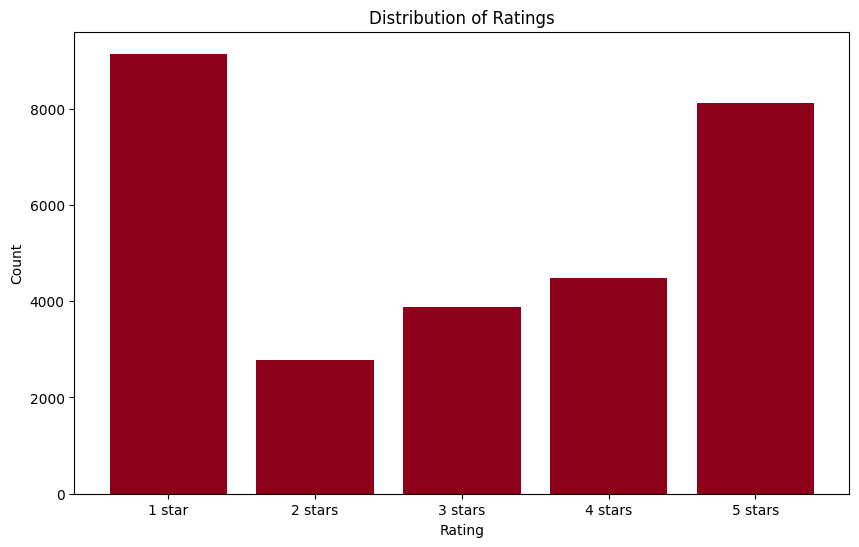

In [9]:
import matplotlib.pyplot as plt

# Define the order
order = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Convert the 'rating' column to a category type with the specified order
df_raw['rating'] = pd.Categorical(df_raw['rating'], categories=order, ordered=True)

# Get value counts
rating_counts = df_raw["rating"].value_counts(sort=False)

# uOttawa RGB colour
uOttawa_red = (143/255, 0/255, 26/255)

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(rating_counts.index, rating_counts.values, color=uOttawa_red)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.show()

## What is the word count distribution of each rating?

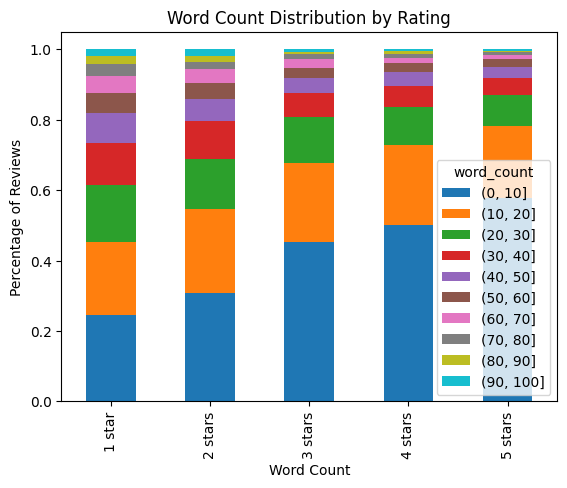

rating
1 star     38.161396
2 stars    31.609025
3 stars    21.590909
4 stars    19.050681
5 stars    15.625956
Name: word_count, dtype: float64

In [10]:
### Bernard Comment: The graph illustrates a bias, in my opinion. There is a pattern in the distribution. What do you think?

# Calculate the word count distribution of each rating

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column for word count
df_raw['word_count'] = df_raw['review'].apply(lambda x: len(x.split()))

# Create a crosstab of rating and word count
df_crosstab = pd.crosstab(df_raw['rating'], pd.cut(df_raw['word_count'], bins, right=True))

# Calculate the percentage of reviews in each bin
df_crosstab_pct = df_crosstab.div(df_crosstab.sum(axis=1), axis=0)

# Plot the results
df_crosstab_pct.plot(kind='bar', stacked=True)
plt.xlabel('Word Count')
plt.ylabel('Percentage of Reviews')
plt.title('Word Count Distribution by Rating')
plt.show()

# Calculate the mean word count for each rating
df_raw.groupby('rating')['word_count'].mean()


# Sampling 2000 words from the data set

---



In [11]:
df_raw["rating"].value_counts()

rating
1 star     9139
5 stars    8106
4 stars    4479
3 stars    3872
2 stars    2770
Name: count, dtype: int64

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Making a list of stop words in English language
lst_stopwords=set(stopwords.words("english"))

def tk_preprocess_text(text, flg_stemm=False, flg_lemm=False):#, lst_stopwords=None):

    #Tokenizing the text into words, lowercasing, and getting rid of punctuation
    lst_text = re.findall(r'\b\w+\b', text.lower())

    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
pd.set_option('mode.chained_assignment', None)
np.random.seed(42)

# Define the ratings
ratings = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Initialize an empty DataFrame to store the sampled rows
df = pd.DataFrame()

# Sample 2000 unique rows for each rating
for rating in ratings:
    df_rating = df_raw[df_raw['rating'] == rating]
    df_sample = df_rating.sample(n=2000)
    df = pd.concat([df, df_sample])

# Reset the index of the new DataFrame
df.reset_index(drop=True, inplace=True)

### Visualizing the newly sampled dataset

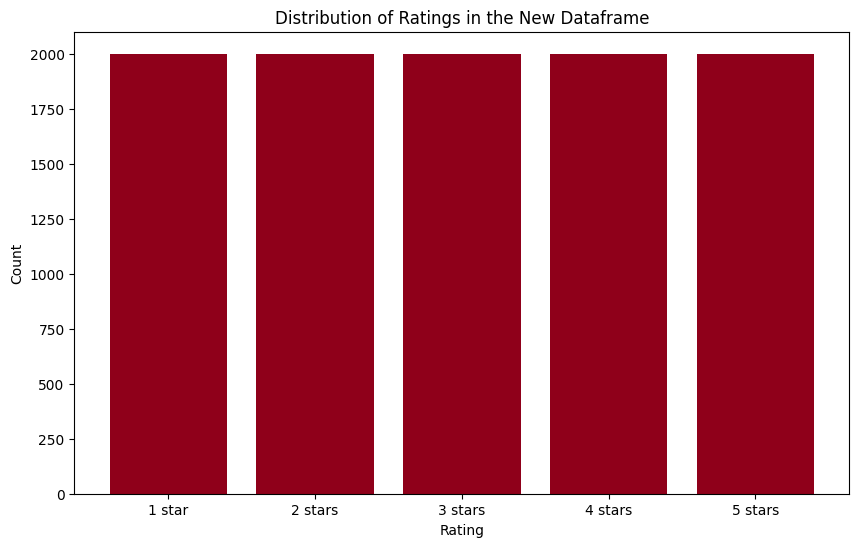

In [14]:
# Define the order
order = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Convert the 'rating' column to a category type with the specified order
df['rating'] = pd.Categorical(df['rating'], categories=order, ordered=True)

# Get value counts
rating_counts = df["rating"].value_counts(sort=False)

# uOttawa RGB colour
uOttawa_red = (143/255, 0/255, 26/255)

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(rating_counts.index, rating_counts.values, color=uOttawa_red)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in the New Dataframe')

plt.show()

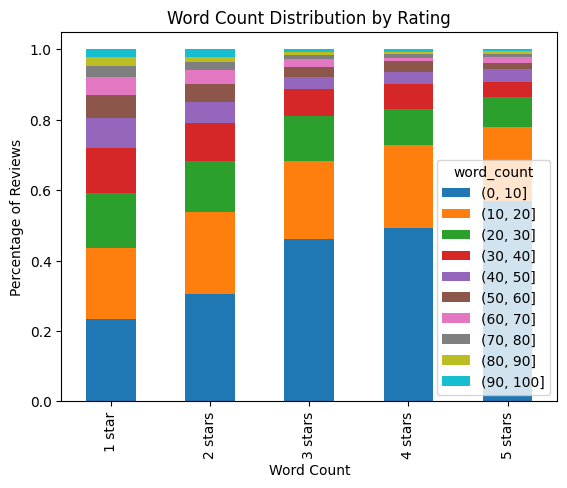

In [15]:
# Calculate the distribution of the word counts in the samples.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the word count distribution of each rating
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

# Create a crosstab of rating and word count
df_crosstab = pd.crosstab(df['rating'], pd.cut(df['word_count'], bins, right=True))

# Calculate the percentage of reviews in each bin
df_crosstab_pct = df_crosstab.div(df_crosstab.sum(axis=1), axis=0)

# Plot the results
df_crosstab_pct.plot(kind='bar', stacked=True)
plt.xlabel('Word Count')
plt.ylabel('Percentage of Reviews')
plt.title('Word Count Distribution by Rating')
plt.show()


In [16]:
# Find non-string instances
non_strings = df[df['review'].apply(lambda x: not isinstance(x, str))]

# Print non-string instances
print(non_strings)


Empty DataFrame
Columns: [reviewer_id, store_name, category, store_address, latitude , longitude, rating_count, review_time, review, rating, word_count]
Index: []


# Create BOW and TF-IDF Representations of the Dataframe

##BOW

In [17]:
import tensorflow as tf

# Extract reviews from dataframe
reviews = df['review'].values

print(reviews)
print(len(reviews))
# Create the Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Fit the tokenizer on the reviews
tokenizer.fit_on_texts(reviews)

# Transform the data into numerical tokens
sequences = tokenizer.texts_to_sequences(reviews)

['this cashier treats us very badly, nasty attitude he should not work here,'
 'Customer Service is a hit or miss. Last time i ate there i got sick. So now i see why i stopped eating fast food like this..'
 'I came here for a Uber eats order and their system was down and they wouldnt give me a Big Mac sauce for my customer for free because their system was down. It'
 ...
 'Stopped in late around 1am but received good service, area  around drive thru was clean despite age of building and outdated signage for the play place but received order and the team member even placed an extra sauce I requested at the window in a separate bag instead of trying to shove 5 in my hand like most do.'
 'Good place'
 'Really awesome experience! A must when in Orlando! Simple. Its the biggest McDonald']
10000


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Use the corpus below for a simpler example of BoW
# corpus = ['This is the first document.', 'This document is the second document.', 'And this is the third one.']
reviews = [tk_preprocess_text(review, True, True) for review in reviews]


tokenizer = Tokenizer(num_words=20000, oov_token="UNK")
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
bow = tokenizer.sequences_to_matrix(sequences, mode='count')
print(tokenizer.word_index)


#np.set_printoptions(threshold=10)
#bow

{'UNK': 1, 'order': 2, 'food': 3, 'mcdonald': 4, 'servic': 5, 'good': 6, 'get': 7, 'place': 8, 'time': 9, 'drive': 10, 'wait': 11, 'go': 12, 'fast': 13, 'one': 14, 'like': 15, 'clean': 16, 'staff': 17, 'custom': 18, 'alway': 19, 'fri': 20, 'great': 21, 'thru': 22, 'locat': 23, 'peopl': 24, 'ask': 25, 'manag': 26, 'minut': 27, 'got': 28, 'nice': 29, 'even': 30, 'work': 31, 'take': 32, 'employe': 33, 'slow': 34, 'back': 35, 'eat': 36, 'went': 37, 'need': 38, 'bad': 39, 'friendli': 40, 'never': 41, 'long': 42, 'busi': 43, 'would': 44, 'line': 45, 'want': 46, 'rude': 47, '2': 48, 'make': 49, 'come': 50, 'meal': 51, 'wrong': 52, 'said': 53, 'give': 54, 'hot': 55, 'use': 56, 'ever': 57, 'quick': 58, 'right': 59, 'coffe': 60, 'fresh': 61, 'realli': 62, 'u': 63, 'cold': 64, 'took': 65, 'love': 66, 'area': 67, 'know': 68, 'breakfast': 69, 'tabl': 70, 'restaur': 71, 'look': 72, 'insid': 73, 'kid': 74, 'drink': 75, 'say': 76, 'also': 77, 'experi': 78, 'way': 79, 'still': 80, 'close': 81, 'burger'

In [19]:
# the following inequality should be true
print(len(bow[0]), ">=", len(tokenizer.word_index),"is",len(bow[0])>= len(tokenizer.word_index))

### Saving the Tokenizer using Pickle
This tokenizer is **needed** during the deployment stage to map the words in the same way.

In [20]:
import pickle

# Save the tokenizer
with open(path_to_data('McDonald_s_Reviews.csv').rpartition('/')[0] + '/' + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

20000 >= 6401 is True


## TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
freq_term_matrix = count_vectorizer.fit_transform(reviews)
tfidf_transformer = TfidfTransformer(norm = "l2")
tfidf_transformer.fit(freq_term_matrix)
tf_idf = tfidf_transformer.transform(freq_term_matrix)

print(tf_idf.shape)

(10000, 6371)


## TF-IDF with Bigrams/Unigrams Enabled

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer_with_bigrams = CountVectorizer(ngram_range=(1, 2))
freq_term_matrix_with_bigrams = count_vectorizer_with_bigrams.fit_transform(reviews)
tfidf_transformer_with_bigrams = TfidfTransformer(norm = "l2")
tfidf_transformer_with_bigrams.fit(freq_term_matrix_with_bigrams)
tf_idf_with_bigrams = tfidf_transformer_with_bigrams.transform(freq_term_matrix_with_bigrams)

print(tf_idf_with_bigrams.shape)

(10000, 73493)


# Creating a train/test split for both BOW and TF-IDF

In [23]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert ratings to categorical labels
encoder = LabelEncoder()
y = encoder.fit_transform(df['rating'])
y = to_categorical(y)  # One-hot encode labels

# Split the data into training and test sets
# BOW
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, y, test_size=0.2, random_state=42)

# TF-IDF
X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(tf_idf, y, test_size=0.2, random_state=42)

# TF-IDF with unigrams and bigrams
X_train_tf_idf_with_bigrams, X_test_tf_idf_with_bigrams, y_train_tf_idf_with_bigrams, y_test_tf_idf_with_bigrams = train_test_split(tf_idf_with_bigrams, y, test_size=0.2, random_state=42)

# Building Models

## Creating a Function to Evaluate Model Performance

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
def evaluate_model(model, history, X_test, y_test):
  # Print categorical accuracy
  if history is not None:
    accuracy = history.history['categorical_accuracy'][-1]
    print(f'Categorical Accuracy: {accuracy}')

  # Make predictions on the test set
  y_pred = model.predict(X_test)
  y_pred = tf.argmax(y_pred, axis=1)
  y_true = tf.argmax(y_test, axis=1)

  # Print confusion matrix
  conf_mat = confusion_matrix(y_true, y_pred)
  print(f'Confusion Matrix:\n{conf_mat}')

  # Print classification report
  report = classification_report(y_true, y_pred, target_names=encoder.classes_)
  print(f'Classification Report:\n{report}')

  # Plot confusion matrix as a heatmap
  plt.figure(figsize=(10,7))
  sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  plt.title('Confusion Matrix for BOW with Sequential Model')
  plt.show()

## Dataset: BOW, Model: Sequential

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # Import train_test_split
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt  # Import matplotlib
from tensorflow.keras.callbacks import TensorBoard #for monitoring

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_bow.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# For callback and model monitoring
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(X_train_bow, y_train_bow, epochs=10, batch_size=32, callbacks=[tensorboard_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - categorical_accuracy: 0.3537 - loss: 1.4416
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - categorical_accuracy: 0.6116 - loss: 0.9981
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - categorical_accuracy: 0.7257 - loss: 0.7274
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - categorical_accuracy: 0.8089 - loss: 0.5130
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - categorical_accuracy: 0.8471 - loss: 0.4089
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - categorical_accuracy: 0.8890 - loss: 0.3085
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - categorical_accuracy: 0.8993 - loss: 0.2612
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - categorical_accuracy: 0.9195 - loss: 0.2243
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - categorical_accuracy: 0.9251 - loss: 0.1914
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - categorical_accuracy: 0.9242 - loss: 0.1915


### Evaluating Model Performance

Categorical Accuracy: 0.9232500195503235
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
[[249  88  51  18   4]
 [ 67 190  88  35  13]
 [ 37  55 193  72  38]
 [ 15  35 105 152 108]
 [ 15  19  65  92 196]]
Classification Report:
              precision    recall  f1-score   support

      1 star       0.65      0.61      0.63       410
     2 stars       0.49      0.48      0.49       393
     3 stars       0.38      0.49      0.43       395
     4 stars       0.41      0.37      0.39       415
     5 stars       0.55      0.51      0.53       387

    accuracy                           0.49      2000
   macro avg       0.50      0.49      0.49      2000
weighted avg       0.50      0.49      0.49      2000



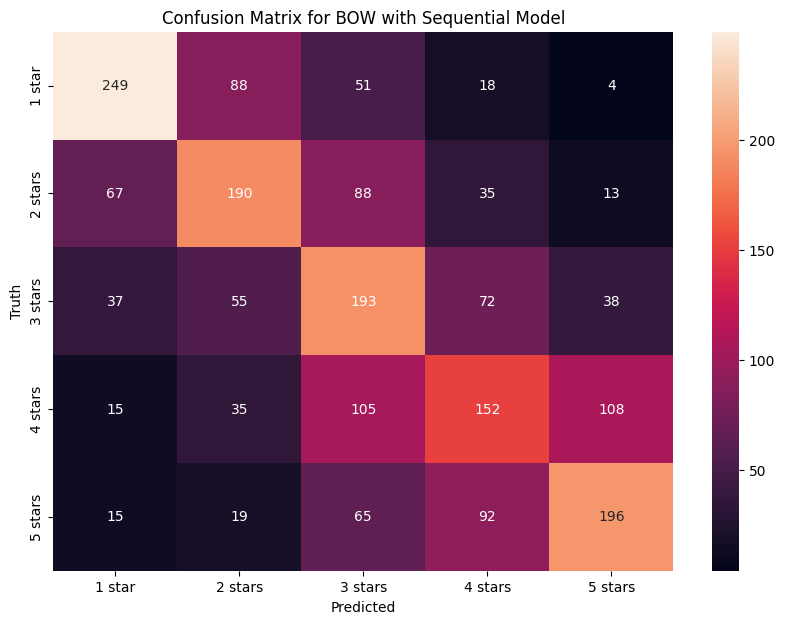

In [33]:
# Use evaluation function to visualize results
evaluate_model(model, history, X_test_bow, y_test_bow)

## Dataset: TF-IDF, Model: Sequential

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # Import train_test_split
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt  # Import matplotlib
from tensorflow.keras.callbacks import TensorBoard #for monitoring

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_tf_idf.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# For callback and model monitoring
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(X_train_tf_idf, y_train_tf_idf, epochs=10, batch_size=32, callbacks=[tensorboard_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - categorical_accuracy: 0.3372 - loss: 1.4830
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - categorical_accuracy: 0.5903 - loss: 1.0193
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - categorical_accuracy: 0.7279 - loss: 0.7617
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - categorical_accuracy: 0.7958 - loss: 0.5703
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - categorical_accuracy: 0.8414 - loss: 0.4297
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - categorical_accuracy: 0.8708 - loss: 0.3564
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - categorical_accuracy: 0.8881 - loss: 0.3039
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - categorical_accuracy: 0.9101 - loss: 0.2506
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - categorical_accuracy: 0.9163 - loss: 0.2239
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - categorical_accuracy: 0.9250 - loss: 0.2066


### Evaluating Model Performance

Categorical Accuracy: 0.9179999828338623
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[228  91  67  16   8]
 [ 67 182  87  39  18]
 [ 38  59 183  76  39]
 [ 18  37 105 158  97]
 [ 18  16  77 103 173]]
Classification Report:
              precision    recall  f1-score   support

      1 star       0.62      0.56      0.59       410
     2 stars       0.47      0.46      0.47       393
     3 stars       0.35      0.46      0.40       395
     4 stars       0.40      0.38      0.39       415
     5 stars       0.52      0.45      0.48       387

    accuracy                           0.46      2000
   macro avg       0.47      0.46      0.46      2000
weighted avg       0.47      0.46      0.47      2000



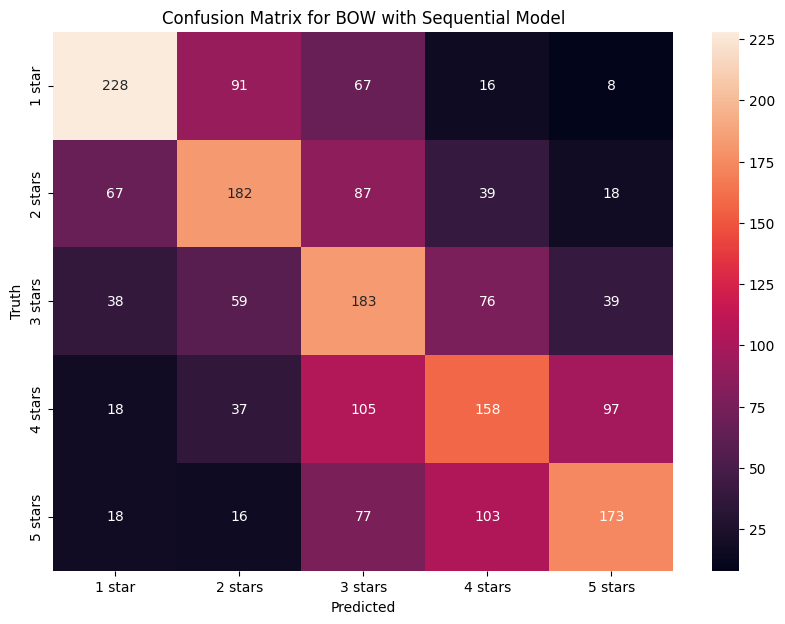

In [ ]:
# Use evaluation function to visualize results
evaluate_model(model, history, X_test_tf_idf, y_test_tf_idf)

# from sklearn.metrics import confusion_matrix, classification_report

# # Print categorical accuracy
# accuracy = history.history['categorical_accuracy'][-1]
# print(f'Categorical Accuracy: {accuracy}')

# # Make predictions on the test set
# y_pred = model.predict(X_test_tf_idf)
# y_pred = tf.argmax(y_pred, axis=1)
# y_true = tf.argmax(y_test_tf_idf, axis=1)

# # Print confusion matrix
# conf_mat = confusion_matrix(y_true, y_pred)
# print(f'Confusion Matrix:\n{conf_mat}')

# # Print classification report
# report = classification_report(y_true, y_pred, target_names=encoder.classes_)
# print(f'Classification Report:\n{report}')

# # Plot confusion matrix as a heatmap
# plt.figure(figsize=(10,7))
# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.title('Confusion Matrix for BOW with Sequential Model')
# plt.show()

## Dataset: TF-IDF with Bigrams, Model: Sequential

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_tf_idf_with_bigrams.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# For callback and model monitoring
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(X_train_tf_idf_with_bigrams, y_train_tf_idf_with_bigrams, epochs=10, batch_size=32, callbacks=[tensorboard_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 274ms/step - categorical_accuracy: 0.3395 - loss: 1.4738
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 199ms/step - categorical_accuracy: 0.7808 - loss: 0.6873
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 188ms/step - categorical_accuracy: 0.9204 - loss: 0.2551
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 187ms/step - categorical_accuracy: 0.9382 - loss: 0.1692
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - categorical_accuracy: 0.9429 - loss: 0.1409
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 217ms/step - categorical_accuracy: 0.9453 - loss: 0.1343
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 186ms/step - categorical_accuracy: 0.9464 - loss: 0.1211
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - categorical_accuracy: 0.9459 - loss: 0.1208
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 185ms/step - categorical_accuracy: 0.9434 - loss: 0.1226
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 194ms/step - categorical_accuracy: 0.9508 - lo

### Evaluating Model Performance

Categorical Accuracy: 0.9442499876022339
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix:
[[254  84  56   8   8]
 [ 78 186  81  19  29]
 [ 53  53 177  53  59]
 [ 16  25  83 150 141]
 [ 16  12  54 102 203]]
Classification Report:
              precision    recall  f1-score   support

      1 star       0.61      0.62      0.61       410
     2 stars       0.52      0.47      0.49       393
     3 stars       0.39      0.45      0.42       395
     4 stars       0.45      0.36      0.40       415
     5 stars       0.46      0.52      0.49       387

    accuracy                           0.48      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.48      0.48      2000



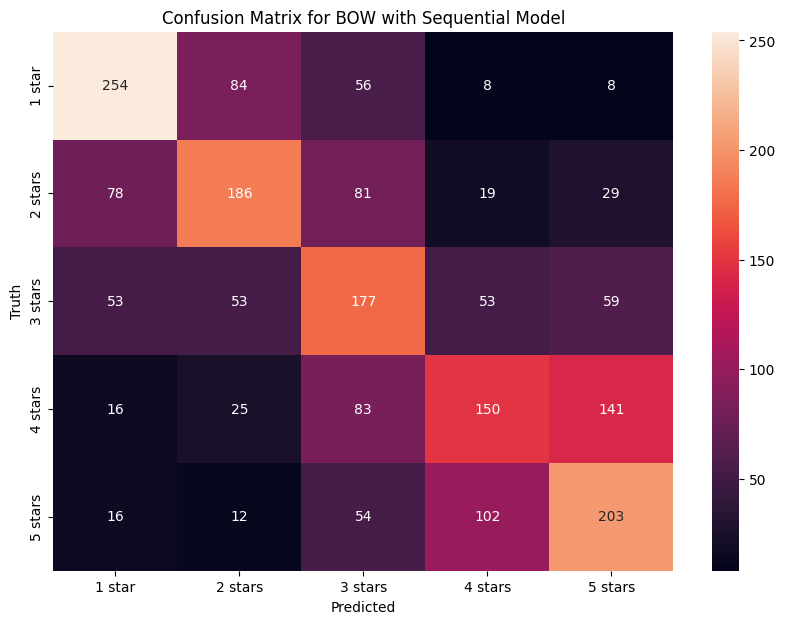

In [ ]:
# Use evaluation function to visualize results
evaluate_model(model, history, X_test_tf_idf_with_bigrams, y_test_tf_idf_with_bigrams)

# # Print categorical accuracy
# accuracy = history.history['categorical_accuracy'][-1]
# print(f'Categorical Accuracy: {accuracy}')

# # Make predictions on the test set
# y_pred = model.predict(X_test_tf_idf_with_bigrams)
# y_pred = tf.argmax(y_pred, axis=1)
# y_true = tf.argmax(y_test_tf_idf_with_bigrams, axis=1)

# # Print confusion matrix
# conf_mat = confusion_matrix(y_true, y_pred)
# print(f'Confusion Matrix:\n{conf_mat}')

# # Print classification report
# report = classification_report(y_true, y_pred, target_names=encoder.classes_)
# print(f'Classification Report:\n{report}')

# # Plot confusion matrix as a heatmap
# plt.figure(figsize=(10,7))
# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.title('Confusion Matrix for BOW with Sequential Model')
# plt.show()

## Dataset: BOW, Model: Random Forest Classifier

In [ ]:
# Create and train a random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
random_forest.fit(X_train_bow, y_train_bow)


              precision    recall  f1-score   support

           0       0.84      0.25      0.39       410
           1       0.78      0.25      0.38       393
           2       0.65      0.19      0.29       395
           3       0.57      0.14      0.23       415
           4       0.58      0.35      0.43       387

   micro avg       0.67      0.23      0.35      2000
   macro avg       0.68      0.24      0.34      2000
weighted avg       0.68      0.23      0.34      2000
 samples avg       0.23      0.23      0.23      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluate Model Performance

In [ ]:
# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test_bow)

# Print the classification report
print(classification_report(y_test_bow, y_pred_rf))

# Evaluate model function
evaluate_model(random_forest, None, X_test_bow, y_test_bow)

## Model: CNN model, Dataset: BOW

In [ ]:
## The code below works, but takes hours to run

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split  # Import train_test_split
# import seaborn as sns  # Import seaborn
# import matplotlib.pyplot as plt  # Import matplotlib
# from tensorflow.keras.callbacks import TensorBoard #for monitoring

# # Define the model
# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train_bow.shape[1]))  # Input layer
# model.add(Conv1D(128, 5, activation='relu'))  # Convolutional layer
# model.add(GlobalMaxPooling1D())  # Pooling layer
# model.add(Dense(64, activation='relu'))  # Hidden layer
# model.add(Dense(5, activation='softmax'))  # Output layer

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# # For callback and model monitoring
# tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# # Train the model
# history = model.fit(X_train_bow, y_train_bow, epochs=10, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/10


KeyboardInterrupt: 

## RNN (INCOMPLETE)

This struggles to run due to dimensionality of data. Maybe try quantization or other ways of reducing dimensionality?

In [ ]:
# Create a new model based on RNN (LSTM) named "model_RNN" and train it.

# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential # Import the Sequential class

# # Define the model
# model_RNN = Sequential()
# model_RNN.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, trainable=True))
# model_RNN.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model_RNN.add(Dense(5, activation='softmax'))

# # Compile the model
# model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# # Train the model
# history_RNN = model_RNN.fit(X_train, y_train, epochs=10, batch_size=32)

# # Make predictions on the test set
# y_pred_RNN = model_RNN.predict(X_test)
# y_pred_RNN = tf.argmax(y_pred_RNN, axis=1)
# y_true = tf.argmax(y_test, axis=1)

# # Print the classification report
# print(classification_report(y_true, y_pred_RNN))


# Error Analysis

What words are most common in 5 star reviews that are being predicted as 4 stars? What is causing the errors?

In [ ]:
# I want to know what are the most common words in reviews that are predicted wrong, regarding the confusion matrix

nltk.download('punkt') # Download the necessary data for tokenization
import pandas as pd

# Get the indices of the misclassified examples
misclassified_indices = []
for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
        misclassified_indices.append(i)

# Extract the misclassified reviews texts
#misclassified_reviews = df.iloc[misclassified_indices]
misclassified_reviews = [reviews[i] for i in misclassified_indices]

# Create a dictionary to store the word counts
word_counts = {}

# Tokenize the reviews and count the words
for review in misclassified_reviews:
    tokens = nltk.word_tokenize(review) # Use nltk.word_tokenize
    for token in tokens:
        if token not in word_counts:
            word_counts[token] = 0
        word_counts[token] += 1

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 50 most common words
print("Top 50 most common words in misclassified reviews:")
for i in range(50):
    print(f"{i+1}. {sorted_word_counts[i][0]}: {sorted_word_counts[i][1]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 50 most common words in misclassified reviews:
1. order: 620
2. food: 325
3. wait: 259
4. servic: 247
5. mcdonald: 244
6. get: 230
7. time: 207
8. drive: 200
9. manag: 193
10. ask: 185
11. minut: 182
12. go: 174
13. custom: 173
14. one: 168
15. place: 153
16. rude: 137
17. thru: 133
18. even: 130
19. said: 129
20. fri: 126
21. like: 126
22. ever: 120
23. peopl: 117
24. never: 117
25. got: 114
26. worst: 110
27. employe: 105
28. back: 104
29. would: 100
30. locat: 99
31. bad: 97
32. take: 94
33. staff: 94
34. give: 91
35. went: 88
36. need: 87
37. work: 86
38. horribl: 82
39. 2: 81
40. want: 81
41. took: 79
42. told: 77
43. wrong: 77
44. eat: 77
45. hour: 71
46. close: 71
47. cold: 71
48. call: 71
49. know: 70
50. say: 70


# Add "Number of Words" as a new feature

In [ ]:
# I want to add "the number of words" per review as a new feature, and train the model again.

import numpy as np
# Calculate the number of words in each review
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

# Create a new feature matrix with the word count
X_new = np.hstack((bow, df['word_count'].values.reshape(-1, 1)))

# Split the data into training and test sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Define the model
model_new = Sequential()
model_new.add(Dense(128, input_dim=X_train_new.shape[1], activation='relu'))  # Input layer, update input_dim
model_new.add(Dense(64, activation='relu'))  # Hidden layer
model_new.add(Dense(5, activation='softmax'))  # Output layer

# Compile the model
model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Train the model on the new feature matrix
history = model_new.fit(X_train_new, y_train, epochs=10, batch_size=32) # Train with updated X_train_new

# Make predictions on the test set
y_pred_new = model_new.predict(X_test_new)
y_pred_new = tf.argmax(y_pred_new, axis=1)
y_true = tf.argmax(y_test, axis=1)

# Print the classification report
report = classification_report(y_true, y_pred_new, target_names=encoder.classes_)
print(f'Classification Report:\n{report}')


# Save Champion Model

In [26]:
from google.colab import drive
print(tf.__version__)


# drive.mount('/gdrive')
# %cd /content/drive/MyDrive/

print(path_to_data('McDonald_s_Reviews.csv').rpartition('/')[0] + '/' + '1')
# model.save(path_to_data('McDonald_s_Reviews.csv').rpartition('/')[0] + '/' + '1')

# Save the model in SavedModel format
tf.saved_model.save(model, path_to_data('McDonald_s_Reviews.csv').rpartition('/')[0] + '/' + '1')

2.16.1
Mounted at /gdrive
[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/'
/content
Mounted at /content/drive
thing /content /content/drive/MyDrive/Project/first_model.keras


In [30]:
from tensorflow.keras.layers import TFSMLayer

# Path
model_path = path_to_data('McDonald_s_Reviews.csv').rpartition('/')[0] + '/' + '1'

# Load the model from the path
model = TFSMLayer(model_path, call_endpoint='serving_default')

